In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.mixture import BayesianGaussianMixture

In [1]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_path = r'C:/Windows/Fonts/H2GTRM.TTF' # HY견명조 폰트 경로

# 2. FontProperties 객체 생성
font_prop = fm.FontProperties(fname=font_path).get_name()

# 3. 마이너스 부호 설정 (필요한 경우)
plt.rc('font', family=font_prop)

plt.rc('axes', unicode_minus=False)

NameError: name 'plt' is not defined

In [3]:
def get_saturday(date):
    days_to_saturday = (5 - date.weekday()) % 7
    return date + pd.Timedelta(days=days_to_saturday)


In [16]:
data_2= pd.read_csv('surface_Tm+weather+cnn.csv')
data_2.drop(columns=['관측소'],inplace=True)

In [17]:
rate = pd.read_excel('어류어획률+어획량.xlsx',sheet_name='어획률')
num = pd.read_excel('어류어획률+어획량.xlsx',sheet_name='어획량')

In [25]:
num

,Date,가자미류,청어,새우,대구,도루묵,기타어류,총어획량
0,2011-02-26,78631.0,429.0,7499.0,2678.0,6749.0,11141.0,107127.0
1,2011-03-05,23746.0,2878.0,2575.0,1553.0,1212.0,5908.0,37872.0
2,2011-03-12,38768.0,1279.0,2718.0,1918.0,30215.0,5036.0,79934.0
3,2011-03-19,45307.0,4544.0,3246.0,1623.0,3635.0,6556.0,64910.0
4,2011-03-26,40459.0,269.0,2694.0,1401.0,3448.0,5603.0,53873.0
...,...,...,...,...,...,...,...,...
723,2025-01-04,44637.0,1046.0,23404.0,6997.0,563.0,3780.0,80427.0
724,2025-01-11,31820.0,1446.0,15736.0,5207.0,289.0,3356.0,57854.0
725,2025-01-18,44568.0,6392.0,26603.0,3023.0,518.0,5269.0,86373.0
726,2025-01-25,64613.0,7337.0,30445.0,0.0,329.0,6790.0,109514.0


In [26]:
data_2

,Week,Date,저층_중앙 수온(℃),중층_중앙 수온(℃),표층_중앙 수온(℃),저층_최고 수온(℃),중층_최고 수온(℃),표층_최고 수온(℃),저층_최저 수온(℃),중층_최저 수온(℃),...,cnn_feat_2038,cnn_feat_2039,cnn_feat_2040,cnn_feat_2041,cnn_feat_2042,cnn_feat_2043,cnn_feat_2044,cnn_feat_2045,cnn_feat_2046,cnn_feat_2047
0,2011-03-05,2011-03-03,8.510000,8.720000,8.600000,8.840000,9.050000,8.960000,8.090000,8.420000,...,0.000000,0.0,0.462288,0.0,0.0,0.0,0.000000,0.031389,0.009081,0.0
1,2011-03-12,2011-03-09,9.596429,9.699107,9.802679,9.645238,9.703571,9.821429,9.540179,9.694643,...,0.000000,0.0,0.824250,0.0,0.0,0.0,0.000000,0.114203,0.117173,0.0
2,2011-03-19,2011-03-16,9.825000,9.956250,10.331250,9.850000,9.975000,10.350000,9.768750,9.937500,...,0.000042,0.0,1.208072,0.0,0.0,0.0,0.004397,0.092996,0.185040,0.0
3,2011-03-26,2011-03-23,10.000000,10.233333,10.900000,10.044444,10.266667,10.933333,9.900000,10.200000,...,0.000000,0.0,0.525835,0.0,0.0,0.0,0.001195,0.000000,0.024426,0.0
4,2011-04-02,2011-03-30,10.175000,10.510417,11.468750,10.238889,10.558333,11.516667,10.031250,10.462500,...,0.000000,0.0,0.354193,0.0,0.0,0.0,0.000000,0.011440,0.009449,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2025-01-04,2025-01-01,13.214286,13.228571,13.271429,13.342857,13.385714,13.428571,13.157143,13.142857,...,0.041458,0.0,0.775744,0.0,0.0,0.0,0.000000,0.185600,0.122448,0.0
723,2025-01-11,2025-01-08,12.600000,12.614286,12.657143,12.757143,12.828571,12.842857,12.428571,12.471429,...,0.039676,0.0,0.731758,0.0,0.0,0.0,0.000000,0.206561,0.121294,0.0
724,2025-01-18,2025-01-15,12.185714,12.214286,12.285714,12.300000,12.400000,12.485714,11.942857,12.100000,...,0.016288,0.0,0.481937,0.0,0.0,0.0,0.000000,0.061789,0.035226,0.0
725,2025-01-25,2025-01-22,12.085714,12.257143,12.371429,12.314286,12.400000,12.514286,11.442857,12.028571,...,0.000000,0.0,0.377029,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [20]:
data_2['Date'] = pd.to_datetime(data_2['Date'], errors='coerce')
data_2['Week'] = data_2['Date'].apply(get_saturday)

In [31]:
data_2 = data_2.groupby('Week').mean().reset_index().drop(columns=['Date'])

In [38]:
data_2_rate

,저층_중앙 수온(℃),중층_중앙 수온(℃),표층_중앙 수온(℃),저층_최고 수온(℃),중층_최고 수온(℃),표층_최고 수온(℃),저층_최저 수온(℃),중층_최저 수온(℃),표층_최저 수온(℃),저층_평균 수온(℃),...,cnn_feat_2046,cnn_feat_2047,Date,가자미류,청어,새우,대구,도루묵,기타어류,총어획량
1,8.510000,8.720000,8.600000,8.840000,9.050000,8.960000,8.090000,8.420000,8.380000,8.520000,...,0.009081,0.0,2011-03-05,62.7,7.6,6.8,4.1,3.2,15.6,37872.0
2,9.596429,9.699107,9.802679,9.645238,9.703571,9.821429,9.540179,9.694643,9.782440,9.594940,...,0.117173,0.0,2011-03-12,48.5,1.6,3.4,2.4,37.8,6.3,79934.0
3,9.825000,9.956250,10.331250,9.850000,9.975000,10.350000,9.768750,9.937500,10.306250,9.818750,...,0.185040,0.0,2011-03-19,69.8,7.0,5.0,2.5,5.6,10.1,64910.0
4,10.000000,10.233333,10.900000,10.044444,10.266667,10.933333,9.900000,10.200000,10.855556,9.988889,...,0.024426,0.0,2011-03-26,75.1,0.5,5.0,2.6,6.4,10.4,53873.0
5,10.175000,10.510417,11.468750,10.238889,10.558333,11.516667,10.031250,10.462500,11.404861,10.159028,...,0.009449,0.0,2011-04-02,80.0,0.0,4.9,5.0,0.8,9.3,86681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,13.214286,13.228571,13.271429,13.342857,13.385714,13.428571,13.157143,13.142857,13.142857,13.228571,...,0.122448,0.0,2025-01-04,55.5,1.3,29.1,8.7,0.7,4.7,80427.0
724,12.600000,12.614286,12.657143,12.757143,12.828571,12.842857,12.428571,12.471429,12.500000,12.600000,...,0.121294,0.0,2025-01-11,55.0,2.5,27.2,9.0,0.5,5.8,57854.0
725,12.185714,12.214286,12.285714,12.300000,12.400000,12.485714,11.942857,12.100000,12.128571,12.157143,...,0.035226,0.0,2025-01-18,51.6,7.4,30.8,3.5,0.6,6.1,86373.0
726,12.085714,12.257143,12.371429,12.314286,12.400000,12.514286,11.442857,12.028571,12.128571,12.071429,...,0.000000,0.0,2025-01-25,59.0,6.7,27.8,0.0,0.3,6.2,109514.0


In [37]:
data_2_rate= data_2.merge(rate,left_on='Week',right_on='Date',how='right').drop(columns=['Week'])[1:]
data_2_num= data_2.merge(num,left_on='Week',right_on='Date',how='right').drop(columns=['Week'])[1:]

In [39]:
data_2_rate.to_csv('어획률+기존.csv',encoding='utf-8-sig',index=False)
data_2_num.to_csv('어획량+기존.csv',encoding='utf-8-sig',index=False)

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
import datetime
import os 
import seaborn as sns


In [6]:
catch_rate = pd.read_excel('어류어획률+어획량.xlsx', sheet_name='어획률') # 어획률 dataframe 주간단위
catch_num= pd.read_excel('어류어획률+어획량.xlsx', sheet_name='어획량') # 어획량 dataframe  주간단위
ocean = pd.read_csv('Ocean_env+Ocean_weather.csv') # ocean dataframe 일간단위

In [9]:
ocean['time'] = pd.to_datetime(ocean['time'], errors='coerce')
ocean['Week'] = ocean['time'].apply(get_saturday)
ocean= ocean.groupby('Week').mean().reset_index() # 주간단위로 평균내기
ocean= ocean.drop(columns=['time'])

In [90]:
ocean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            727 non-null    datetime64[ns]
 1   염분_50m          727 non-null    float64       
 2   염분_100m         727 non-null    float64       
 3   염분_200m         727 non-null    float64       
 4   염분_300m         727 non-null    float64       
 5   염분_400m         727 non-null    float64       
 6   염분_500m         727 non-null    float64       
 7   해저수온_50m        727 non-null    float64       
 8   해저수온_100m       727 non-null    float64       
 9   해저수온_200m       727 non-null    float64       
 10  해저수온_300m       727 non-null    float64       
 11  해저수온_400m       727 non-null    float64       
 12  해저수온_500m       727 non-null    float64       
 13  해수유속(E)_50m     727 non-null    float64       
 14  해수유속(E)_100m    727 non-null    float64       
 15  해수유속(E

In [95]:
catch_num.isnull().sum()

Date     0
가자미류     0
청어       0
새우       0
대구       0
도루묵      0
기타어류     0
총어획량     0
금지여부     0
dtype: int64

In [10]:
catch_rate['금지여부'] = catch_rate['가자미류'].isna().astype(int)
catch_num['금지여부'] = catch_num['가자미류'].isna().astype(int)


In [11]:
catch_rate=catch_rate.fillna(0)
catch_num=catch_num.fillna(0)


In [12]:
rate_ocean = pd.merge(catch_rate, ocean, left_on='Date',right_on='Week', how='left')[1:]
num_ocean = pd.merge(catch_num, ocean, left_on='Date',right_on='Week', how='left')[1:]



In [13]:
num_ocean.drop(columns=['Week'], inplace=True)
rate_ocean.drop(columns=['Week'], inplace=True)

In [14]:
num_ocean.set_index('Date',inplace=True)
rate_ocean.set_index('Date',inplace=True)

In [20]:
num_ocean.to_csv('Num_ocean.csv',encoding='utf-8-sig',index=True)

In [15]:

rate_ocean.groupby('금지여부').count()

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,염분_50m,염분_100m,염분_200m,...,규산염_500m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),평균 파주기(sec)
금지여부,,,,,,,,,,,,,,,,,,,,,
0,686,686,686,686,686,686,686,686,686,686,...,686,686,686,686,686,686,686,686,686,686
1,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


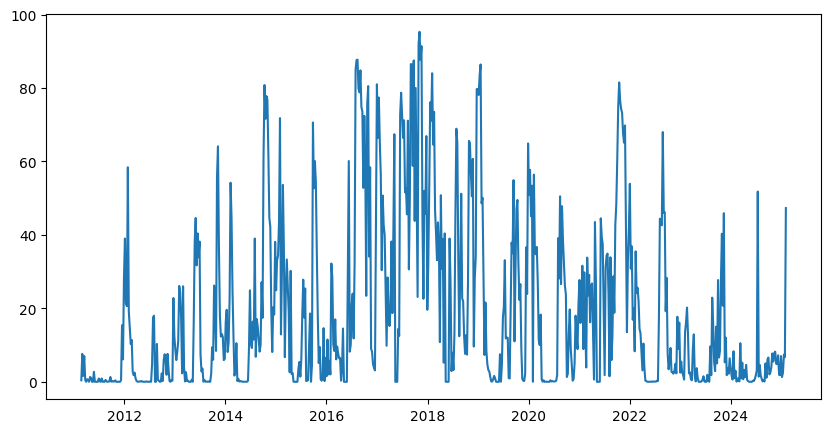

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(catch_rate['Date'],catch_rate['청어'])
plt.show()

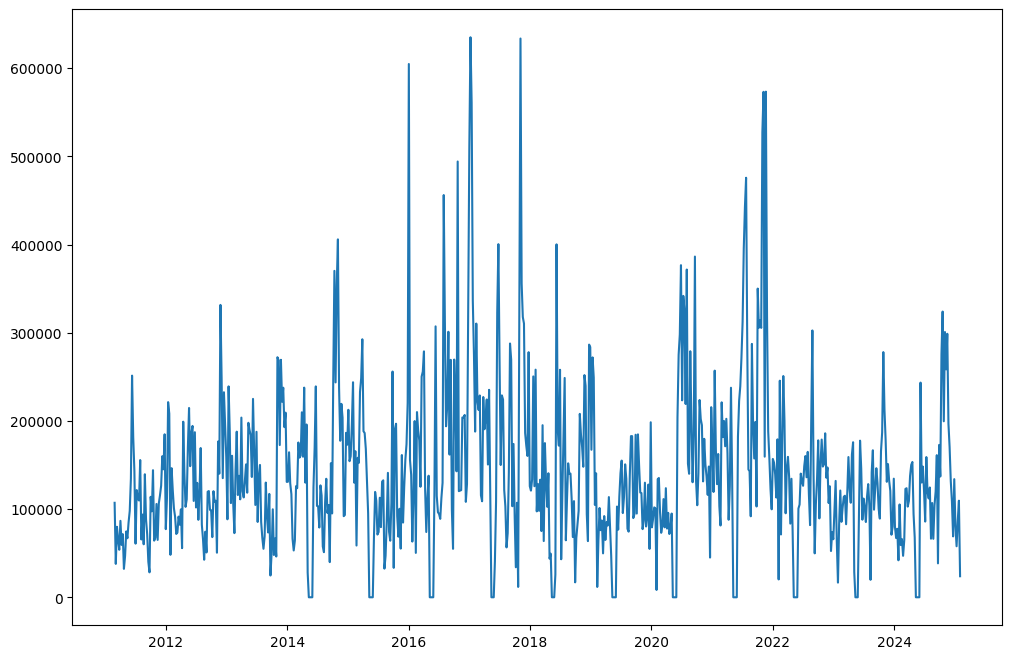

In [102]:
plt.figure(figsize=(12, 8))
plt.plot(catch_num['Date'],catch_num['총어획량 '])
plt.show()

In [61]:
catch_rate.groupby('금지여부').count()

,Date,가자미류,청어,새우,대구,도루묵,기타어류,총어획량
금지여부,,,,,,,,
0,687,687,687,687,687,687,687,687
1,41,41,41,41,41,41,41,41


In [150]:
rate_ocean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727 entries, 2011-03-05 to 2025-02-01
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   가자미류            727 non-null    float64
 1   청어              727 non-null    float64
 2   새우              727 non-null    float64
 3   대구              727 non-null    float64
 4   도루묵             727 non-null    float64
 5   기타어류            727 non-null    float64
 6   총어획량            727 non-null    float64
 7   금지여부            727 non-null    int64  
 8   염분_50m          727 non-null    float64
 9   염분_100m         727 non-null    float64
 10  염분_200m         727 non-null    float64
 11  염분_300m         727 non-null    float64
 12  염분_400m         727 non-null    float64
 13  염분_500m         727 non-null    float64
 14  해저수온_50m        727 non-null    float64
 15  해저수온_100m       727 non-null    float64
 16  해저수온_200m       727 non-null    float64
 17  해저수온_300m       

In [151]:
rate_ocean_corr=rate_ocean.corr()

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(rate_ocean_corr, annot=True,cmap='coolwarm')
plt.show()

In [ ]:
corr_abs = num_ocean.corr().abs()
temp_corr = corr_abs.copy()
np.fill_diagonal(temp_corr.values, 0)
max_abs_corr = temp_corr.max(axis=0)
low_cor = 0.3
slected_features = max_abs_corr[max_abs_corr > low_cor].index.tolist()
print(f"현재 최소 상관계수 {low_cor}에서 선택된 feature 수 : {len(slected_features)} \n현재 선택된 특성:{slected_features}")

# 높은 상관계수 제거 
high_df_corr = rate_ocean[slected_features].corr().abs()
upper = high_df_corr.where(np.triu(np.ones(high_df_corr.shape), k=1).astype(bool))
high_cor = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > high_cor)]
print(f"현재 최소 상관계수 {high_cor}에서 선택된 feature 수 : {len(to_drop)} \n현재 선택된 특성:{to_drop}")

현재 최소 상관계수 0.3에서 선택된 feature 수 : 72 
현재 선택된 특성:['가자미류', '청어', '새우', '대구', '도루묵', '총어획량 ', '금지여부', '염분_50m', '염분_100m', '염분_200m', '염분_300m', '염분_400m', '염분_500m', '해저수온_50m', '해저수온_100m', '해저수온_200m', '해저수온_300m', '해저수온_400m', '해저수온_500m', '해수유속(E)_50m', '해수유속(E)_100m', '해수유속(E)_200m', '해수유속(E)_300m', '해수유속(E)_400m', '해수유속(E)_500m', '해수유속(N)_50m', '해수유속(N)_100m', '해수유속(N)_200m', '해수유속(N)_300m', '해수유속(N)_400m', '해수유속(N)_500m', 'mean_해수면높이', 'mean_혼합층 깊이', '클로로필_50m', '클로로필_100m', '클로로필_200m', '클로로필_300m', '클로로필_400m', '클로로필_500m', '질산염_50m', '질산염_100m', '질산염_200m', '질산염_300m', '질산염_400m', '질산염_500m', '용존 산소_50m', '용존 산소_100m', '용존 산소_200m', '용존 산소_300m', '용존 산소_400m', '용존 산소_500m', ' 인산염_50m', ' 인산염_100m', ' 인산염_200m', ' 인산염_300m', ' 인산염_400m', ' 인산염_500m', '규산염_50m', '규산염_100m', '규산염_200m', '규산염_300m', '규산염_400m', '규산염_500m', 'mean_광확산 감쇠 계수', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 수온(°C)', '평균 최대 파고(m)', '평균 유의 파고(m)', '평균 파주기(sec)']
현재 최소 상관계수 0.85에서 선택된 feature 수 

In [ ]:
# pd.set_option('display.max_rows',10)
# stacked= rate_ocean_corr.stack().reset_index()
# stacked.columns=['변수1','변수2','상관계수']
# stacked=stacked[stacked['변수1']!=stacked['변수2']]
# filtered=stacked[(stacked['상관계수']>0.2)&(stacked['상관계수']<0.9)]

# filtered

,변수1,변수2,상관계수
79,청어,총어획량,0.503798
88,청어,해저수온_100m,0.260777
89,청어,해저수온_200m,0.246000
105,청어,mean_해수면높이,0.220042
110,청어,클로로필_300m,0.226614
...,...,...,...
5308,평균 파주기(sec),인산염_50m,0.317880
5321,평균 파주기(sec),평균 풍속(m/s),0.444396
5322,평균 파주기(sec),평균기압(hPa),0.334190
5326,평균 파주기(sec),평균 최대 파고(m),0.721652


In [214]:
rate_ocean.drop(columns=to_drop,inplace=True)
num_ocean.drop(columns=to_drop,inplace=True)

KeyError: "['해저수온_50m', '해수유속(E)_200m', '해수유속(E)_300m', '해수유속(E)_400m', '해수유속(E)_500m', '해수유속(N)_200m', '해수유속(N)_300m', '해수유속(N)_400m', '해수유속(N)_500m', '질산염_400m', '질산염_500m', '용존 산소_100m', '용존 산소_200m', '용존 산소_400m', '용존 산소_500m', ' 인산염_100m', ' 인산염_200m', ' 인산염_300m', ' 인산염_400m', ' 인산염_500m', '규산염_100m', '규산염_200m', '규산염_300m', '규산염_400m', '규산염_500m', '평균 수온(°C)', '평균 유의 파고(m)'] not found in axis"

In [313]:
# scaler = PowerTransformer(method='yeo-johnson', standardize=True)
#scaler =MinMaxScaler()
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = MaxAbsScaler()
test_scale = scaler.fit_transform(rate_ocean)   

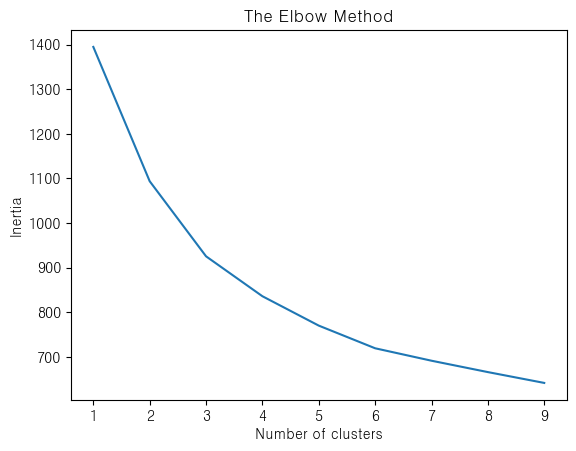

In [294]:
inertia = []
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, n_init=10, random_state=42)
    kmeans.fit(test_scale)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [243]:
range_n_clusters = list(range(2,15))

For n_clusters = 2, the average silhouette_score is : 0.159
For n_clusters = 3, the average silhouette_score is : 0.138
For n_clusters = 4, the average silhouette_score is : 0.124
For n_clusters = 5, the average silhouette_score is : 0.138
For n_clusters = 6, the average silhouette_score is : 0.119
For n_clusters = 7, the average silhouette_score is : 0.130
For n_clusters = 8, the average silhouette_score is : 0.140
For n_clusters = 9, the average silhouette_score is : 0.148
For n_clusters = 10, the average silhouette_score is : 0.131
For n_clusters = 11, the average silhouette_score is : 0.135
For n_clusters = 12, the average silhouette_score is : 0.093
For n_clusters = 13, the average silhouette_score is : 0.121
For n_clusters = 14, the average silhouette_score is : 0.124


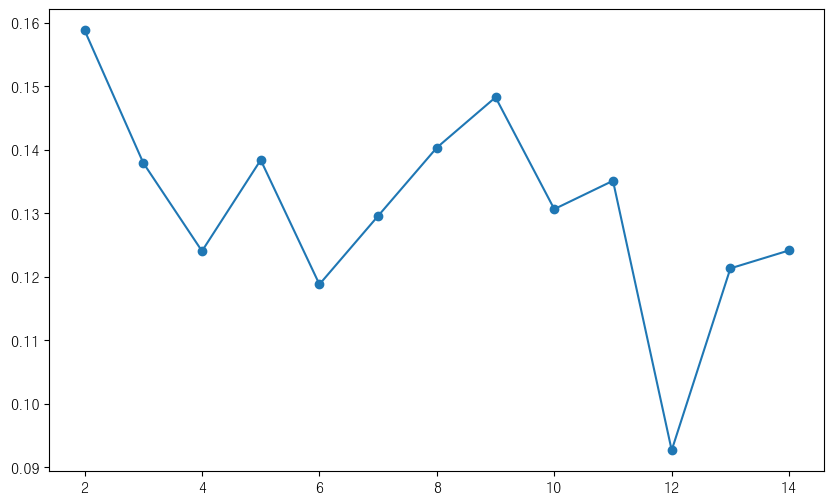

In [ ]:
silhouette_avg_scores = []
for n_clusters in range_n_clusters:
    bgm = BayesianGaussianMixture(n_components=n_clusters, random_state=42,covariance_type='diag',max_iter=100)
    cluster_labels=bgm.fit_predict(test_scale)# 데이터 X에 대해 클러스터링 수행, 각 데이터 포인트가 속한 클러스터 레이블 반환

    # 실루엣 스코어(Silhouette Score) 계산:
    silhouette_avg = silhouette_score(test_scale, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')

In [ ]:
silhouette_avg_scores = []
for n_clusters in range_n_clusters:
    bgm = BayesianGaussianMixture(n_components=n_clusters, random_state=42,covariance_type='diag',max_iter=100)
    cluster_labels=bgm.fit_predict(test_scale)# 데이터 X에 대해 클러스터링 수행, 각 데이터 포인트가 속한 클러스터 레이블 반환

    # 실루엣 스코어(Silhouette Score) 계산:
    silhouette_avg = silhouette_score(test_scale, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')

For n_clusters = 2, the average silhouette_score is : 0.179
For n_clusters = 3, the average silhouette_score is : 0.164
For n_clusters = 4, the average silhouette_score is : 0.148
For n_clusters = 5, the average silhouette_score is : 0.159
For n_clusters = 6, the average silhouette_score is : 0.149
For n_clusters = 7, the average silhouette_score is : 0.139
For n_clusters = 8, the average silhouette_score is : 0.155
For n_clusters = 9, the average silhouette_score is : 0.151
For n_clusters = 10, the average silhouette_score is : 0.141
For n_clusters = 11, the average silhouette_score is : 0.137
For n_clusters = 12, the average silhouette_score is : 0.141
For n_clusters = 13, the average silhouette_score is : 0.150
For n_clusters = 14, the average silhouette_score is : 0.149


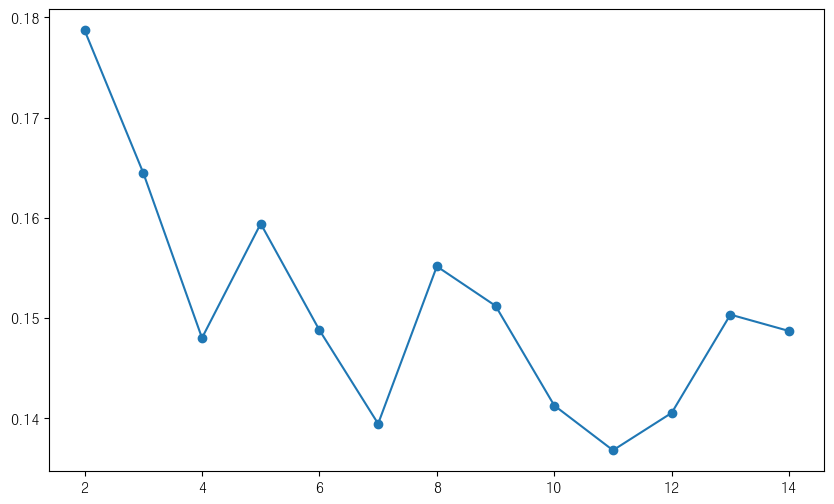

In [315]:
silhouette_avg_scores = []
#실루엣 K=3
# 각 클러스터 수(n_clusters)에 대해 KMeans 알고리즘 실행
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)  # 클러스터 수를 n_clusters로 설정하여 KMeans 객체를 생성
    cluster_labels = clusterer.fit_predict(test_scale) # 데이터 X에 대해 클러스터링 수행, 각 데이터 포인트가 속한 클러스터 레이블 반환

    # 실루엣 스코어(Silhouette Score) 계산:
    silhouette_avg = silhouette_score(test_scale, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')

In [ ]:
clusterer = KMeans(n_clusters=5,init='k-means++', max_iter=100, n_init=10, random_state=42)
bgm = BayesianGaussianMixture(n_components=9, random_state=42,covariance_type='diag',max_iter=100)

In [317]:
rate_ocean['Target'] = clusterer.fit_predict(test_scale)
rate_ocean.groupby('Target').mean()

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,염분_100m,...,용존 산소_300m,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec)
Target,,,,,,,,,,,,,,,,,,,,,
0,46.100943,8.955660,4.522642,6.801792,28.168019,5.450943,128939.028302,0.0,34.170897,34.244924,...,217.052102,0.098873,2.573413,0.088903,5.840162,1014.535310,73.525606,12.860647,1.899730,5.248922
1,34.860000,27.521611,12.647222,9.846889,9.095556,6.028722,172531.300000,0.0,33.252434,34.149836,...,215.346585,0.036586,3.891040,0.060687,6.190952,1019.084444,62.997619,16.022063,2.410000,5.995238
2,34.809392,23.092210,7.025083,5.588950,22.348508,7.135856,142543.497238,0.0,34.079660,34.111374,...,217.078948,0.210406,3.569706,0.053372,6.800742,1021.146677,60.101815,6.338516,2.846346,6.479605
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,34.118128,34.307627,...,214.267846,0.063875,2.662276,0.074253,5.269686,1010.502439,79.878049,16.969686,1.627875,5.111847
4,44.757078,18.657306,5.329680,5.247717,19.485616,6.522603,149021.027397,0.0,33.361176,34.280750,...,215.112658,0.040791,3.725885,0.052121,4.602740,1008.407958,86.285714,22.988128,1.434442,5.221918


In [318]:
rate_ocean['Target'] = bgm.fit_predict(test_scale)
rate_ocean.groupby('Target').mean()


,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,염분_100m,...,용존 산소_300m,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec)
Target,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,34.118128,34.307627,...,214.267846,0.063875,2.662276,0.074253,5.269686,1010.502439,79.878049,16.969686,1.627875,5.111847
1,44.815328,18.372336,3.797810,3.351606,24.428102,5.234818,157086.744526,0.0,33.607349,34.297313,...,215.779603,0.041803,3.514440,0.051248,4.420647,1007.671324,87.340980,22.205944,1.338895,5.254640
2,57.674074,5.394444,22.429630,6.492593,2.002963,6.006296,83189.111111,0.0,34.049893,34.088790,...,215.330465,0.202901,3.331861,0.046029,7.184656,1022.352910,62.910053,7.066667,2.850265,5.268254
3,44.343860,11.995439,13.335088,17.826316,3.651053,8.848246,145924.403509,0.0,33.028511,34.225044,...,212.478180,0.034731,3.820932,0.052718,4.946617,1010.851880,84.949875,24.371429,1.527068,4.452882
4,31.758599,26.575414,4.212357,5.258599,24.952866,7.242166,152502.318471,0.0,34.111694,34.126088,...,217.361694,0.213962,3.614239,0.056265,6.614322,1020.849900,59.686988,6.326752,2.777270,6.597052
5,32.479310,17.364368,18.866667,8.278161,16.859655,6.151839,159893.954023,0.0,33.539117,34.077253,...,215.754819,0.053603,3.367545,0.056861,6.906897,1020.415764,58.326765,11.572906,2.786535,6.105747
6,38.591150,35.395487,4.568142,6.043540,9.025664,6.376018,171003.911504,0.0,32.978928,34.235427,...,215.577859,0.028560,4.407571,0.061660,5.451707,1015.135145,70.847029,20.725664,2.021871,6.097851
7,45.798969,8.546392,4.211340,7.145258,28.725876,5.572165,129609.649485,0.0,34.169957,34.247073,...,216.879880,0.093391,2.507725,0.089162,5.869219,1014.554197,74.173785,13.047423,1.909278,5.288513
8,38.563636,28.245455,7.381818,7.445455,12.354545,6.009091,120477.454545,0.0,32.849685,34.139295,...,217.253055,0.032373,4.027828,0.068802,6.007792,1018.194805,68.727273,18.085714,2.267532,6.092208


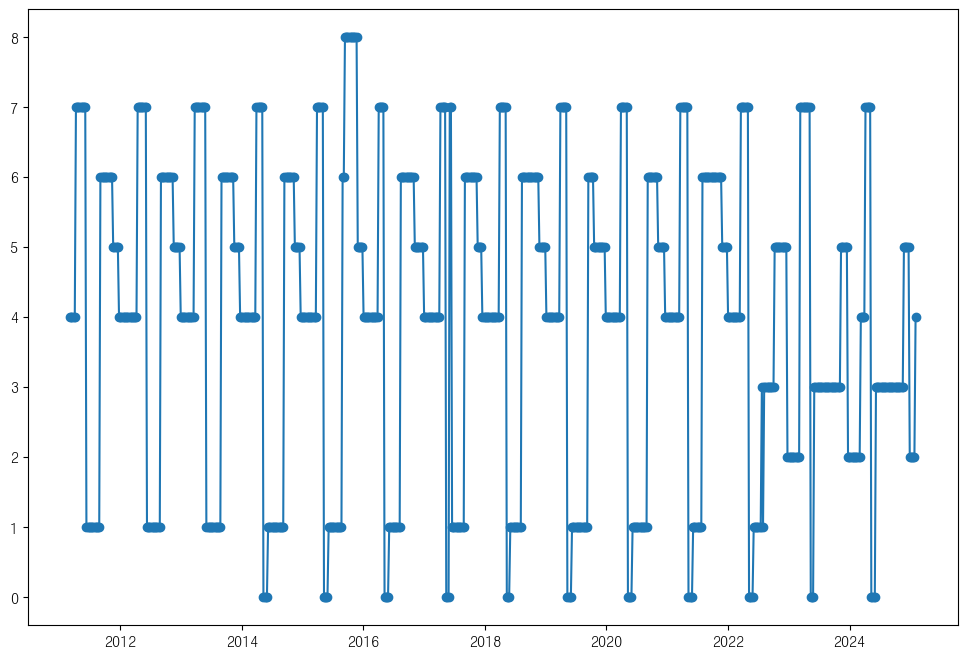

In [326]:
plt.figure(figsize=(12, 8))
plt.plot(rate_ocean.index, rate_ocean['Target'], marker='o', linestyle='-')
plt.show()

In [322]:
rate_ocean.groupby('Target').count()

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,염분_100m,...,용존 산소_300m,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec)
Target,,,,,,,,,,,,,,,,,,,,,
0,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
1,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
2,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
4,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
5,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
6,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
7,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
8,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [327]:
rate_ocean.to_csv('rate_ocean_final.csv', encoding='utf-8-sig',index=True)